In [73]:
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spacy.lang.en import STOP_WORDS
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

**Load data**

In [2]:
data = pd.read_csv("../data/twitter-airline-sentiment/Tweets.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


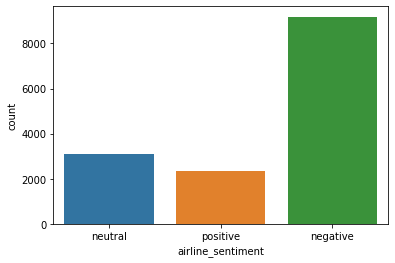

In [5]:
tweet = sns.countplot(data.airline_sentiment)

**Data Cleaning**

**Removing twitter @VirginAmerica from tweet column**

In [6]:
data['new_tweet'] = data.text.str.replace('@VirginAmerica', '')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,new_tweet
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What @dhepburn said.
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experien...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take an...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""en..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it


**Removing Punctuations, Numbers, and Special Characters**

In [7]:
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line
data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
data['new_tweet'] = data['new_tweet'].str.replace("#", "")
data['new_tweet'] = data['new_tweet'].str.replace("@", "")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,new_tweet
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you ve added commercials to the experien...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn t today Must mean I need to take an...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),it s really aggressive to blast obnoxious en...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it s a really big bad thing about it


**Tokenization**

In [8]:
data['new_tweet'] = data['new_tweet'].apply(lambda x: x.split())
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,new_tweet
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[What, dhepburn, said]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[plus, you, ve, added, commercials, to, the, e..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[I, didn, t, today, Must, mean, I, need, to, t..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[it, s, really, aggressive, to, blast, obnoxio..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[and, it, s, a, really, big, bad, thing, about..."


**Stemmer**

In [9]:
stemmer = SnowballStemmer("english")
data['new_tweet']= data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,new_tweet
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[what, dhepburn, said]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[plus, you, ve, ad, commerci, to, the, experi,..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[i, didn, t, today, must, mean, i, need, to, t..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[it, s, realli, aggress, to, blast, obnoxi, en..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[and, it, s, a, realli, big, bad, thing, about..."


In [10]:
data.new_tweet.head()

0                               [what, dhepburn, said]
1    [plus, you, ve, ad, commerci, to, the, experi,...
2    [i, didn, t, today, must, mean, i, need, to, t...
3    [it, s, realli, aggress, to, blast, obnoxi, en...
4    [and, it, s, a, realli, big, bad, thing, about...
Name: new_tweet, dtype: object

**Function to remove stop words from the data using Spacy STOP_WORDS**

In [11]:
def process_stop_words(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in STOP_WORDS]


In [12]:
data['new_tweet'] = data['new_tweet'].apply(process_stop_words)

In [13]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,new_tweet
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[dhepburn, said]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[commerci, tacki, ad, plus, experi, ve]"
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[today, anoth, t, mean, trip, need, didn]"
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[aggress, blast, face, s, obnoxi, littl, amp, ..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[s, bad, big, realli, thing]"


**create a word cloud which will depict the most common words in entire data set**

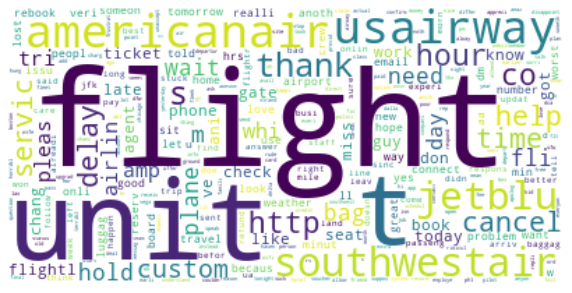

In [28]:
# get individual words
words = []
for line in data['new_tweet']: 
 words.extend(line)
 
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Tweets which are labeled as positive**

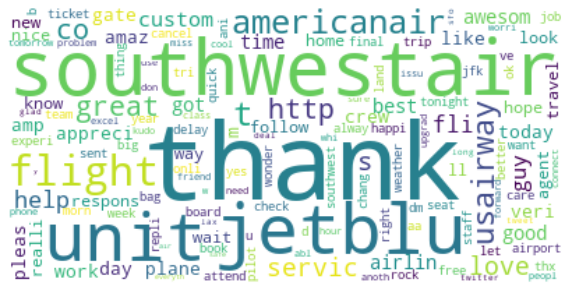

In [36]:
positive_words = []
for line in data.new_tweet[data.airline_sentiment=='positive']: 
 positive_words.extend(line)
 
# create a word frequency dictionary
poswordfreq = Counter(positive_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(poswordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Tweets which are labeled as negative**

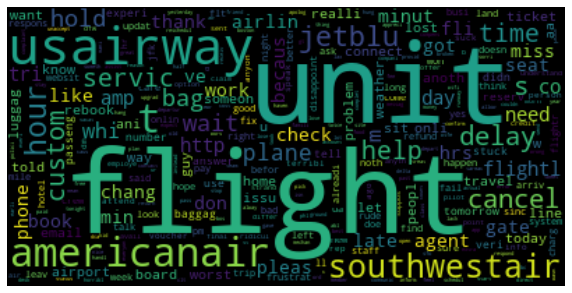

In [38]:
negative_words = []
for line in data.new_tweet[data.airline_sentiment=='negative']: 
 negative_words.extend(line)
 
# create a word frequency dictionary
negwordfreq = Counter(negative_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
 background_color='black',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(negwordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**TfidfVectorizer will need to take a list(-like) of strings to create tf-idf features, we need to convert our lists in data['new_tweet'] to a string. We probably need to connect the strings in our lists first before passing them to TfidfVectorizer**

In [60]:
x_train, x_test, y_train, y_test = train_test_split(data['new_tweet'].apply(lambda x: ' '.join(x)), 
      data['airline_sentiment'], test_size = 0.2, random_state = 42)

**We will use SciKit Learn’s CountVectorizer function which will convert a collection of text documents into a matrix of token counts.**

In [61]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [62]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(11712, 9406)
(11712, 9406)


In [63]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(2928, 9406)
(2928, 9406)


**Training our data with random forest classifier model.**

In [66]:
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)
predictions = model.predict(x_test_tfidf)

**Confusion Matrix**

In [67]:
confusion_matrix(y_test,predictions)

array([[1779,   80,   30],
       [ 300,  233,   47],
       [ 146,   47,  266]], dtype=int64)

In [71]:
score = model.score(x_test_tfidf, y_test)
print("score of Random Forest Classifier is :" , score)

score of Random Forest Classifier is : 0.7780054644808743


**f1-score**

In [79]:
f1_score(y_test,predictions,average='weighted')

0.7601470766455473

In [80]:
f1_score(y_test,predictions,average='micro')

0.7780054644808743

In [81]:
f1_score(y_test,predictions,average='macro')

0.674646017516881

**Accuracy_score**

In [69]:
accuracy_score(y_test,predictions)*100

77.80054644808743

**Precision Score**

In [82]:
print("Precision Score : ",precision_score(y_test, predictions,average='weighted'))
print("Precision Score : ",recall_score(y_test, predictions,average='weighted'))

Precision Score :  0.7656076105868557
Precision Score :  0.7780054644808743


In [83]:
print("Precision Score : ",precision_score(y_test, predictions,average='micro'))
print("Precision Score : ",recall_score(y_test, predictions,average='micro'))

Precision Score :  0.7780054644808743
Precision Score :  0.7780054644808743


In [84]:
print("Precision Score : ",precision_score(y_test, predictions,average='macro'))
print("Precision Score : ",recall_score(y_test, predictions,average='macro'))

Precision Score :  0.7407609960338691
Precision Score :  0.6410043221283951
